In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
abbrev = pd.read_csv("../cleaned_data/abbrev.csv", sep=";")

In [20]:
chemicals = abbrev.drop(labels=["ndb", "Shrt_Desc", "Refuse_Pct", "GmWt_1", "GmWt_Desc1", "GmWt_2", "GmWt_Desc2"], axis=1)
for column in chemicals.columns:
    chemicals[column] = chemicals[column].apply(lambda x: x if type(x) != str else float(x.replace(",", ".")))

Text(0.5, 1.0, 'Correlations')

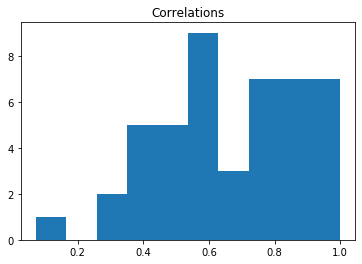

In [21]:
corr = chemicals.corr()
largest_corr = []
for column in chemicals.columns:
    largest_corr.append(corr[column].apply(abs).nlargest(2)[1])
plt.hist(largest_corr)
plt.title("Correlations")

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
imputer = SimpleImputer(strategy="mean")
reg = LinearRegression()

In [27]:
r2 = []
for column in chemicals.columns:
    curr_chemicals = chemicals.dropna(subset=[column])
    dependent_variables = imputer.fit_transform(curr_chemicals.drop(columns=[column]))
    reg.fit(dependent_variables, curr_chemicals[column])
    r2.append(reg.score(dependent_variables, curr_chemicals[column]))

In [28]:
sum(r2) / len(r2)

0.7814435908196471

Text(0.5, 1.0, 'Determination coefficients')

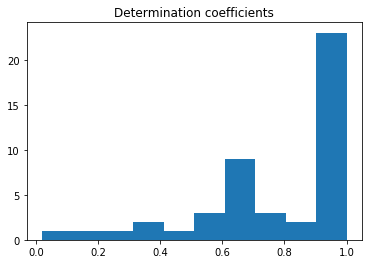

In [29]:
plt.hist(r2)
plt.title("Determination coefficients")